## Regresión linean (Validación)

### Dividir el data set en conjunto de entrenamiento y de test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\ads\Advertising.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


(array([ 6., 11., 33., 41., 40., 28., 26.,  9.,  2.,  4.]),
 array([-2.17349807, -1.65076446, -1.12803084, -0.60529723, -0.08256361,
         0.44017   ,  0.96290361,  1.48563723,  2.00837084,  2.53110446,
         3.05383807]),
 <a list of 10 Patch objects>)

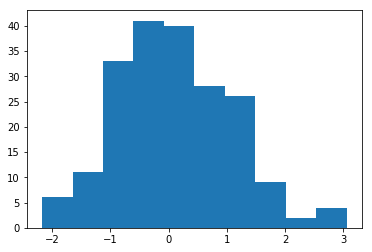

In [7]:
a = np.random.randn(len(data))
plt.hist(a)

In [8]:
# División del conjunto de entrenamiento, y del conjunto de test
check = (a<0.8)
training = data[check]  #contenido de check
testing = data[~check]  #contenido restante

In [9]:
# Tamaño de conjunto de entrenamiento y de Test
len(training), len(testing)

(154, 46)

In [10]:
# Importación de statsmodel para modelo lineal
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV+Radio', data=training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     591.9
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           3.49e-72
Time:                        21:21:51   Log-Likelihood:                -303.67
No. Observations:                 154   AIC:                             613.3
Df Residuals:                     151   BIC:                             622.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9205      0.350      8.350      0.000       2.229       3.611
TV             0.0461      0.002     29.041      0.000       0.043       0.049
Radio          0.1795      0.010     18.375      0.000       0.160       0.199
==============================================================================
Omnibus:                       45.799   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.871
Skew:                          -1.317   Prob(JB):                     1.52e-21
Kurtosis:                       5.829   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo
* Sales = 2.9205 + 0.0461 * TV + 0.1795 * Radio

## Validación del modelo con el conjunto de testing

In [16]:
sales_pred = lm.predict(testing)

In [18]:
#Suma de los cuadrados de los residuos
SSD1 = sum((testing['Sales']-sales_pred)**2)
SSD1

99.1463295694577

In [19]:
RSE1 = np.sqrt(SSD1/(len(testing)-2-1))
RSE1

1.5184625759756318

In [21]:
sales_mean = np.mean(testing['Sales'])
error = RSE1 / sales_mean
error

0.10066187994650394

In [22]:
lm2 = smf.ols(formula='Sales~TV+Radio', data=testing).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     368.0
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           8.97e-28
Time:                        21:31:46   Log-Likelihood:                -74.335
No. Observations:                  46   AIC:                             154.7
Df Residuals:                      43   BIC:                             160.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.479      6.997      0.000       2.386       4.318
TV             0.0423      0.003     15.990      0.000       0.037       0.048
Radio          0.2111      0.012     17.335      0.000       0.187       0.236
==============================================================================
Omnibus:                        4.060   Durbin-Watson:                   2.350
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                2.888
Skew:                          -0.497   Prob(JB):                        0.236
Kurtosis:                       3.720   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Resumen de las regresiones lineales